In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd

# *Machine Learning Classification for TNOs*


This notebook demonstrates the most basic call to the classifier using sbd.**run_and_MLclassify_TNO**

If will make a new simulation for the specified TNO with the best-fit orbit and two clones representing 3-sigma minumum and maxiumum semimajor axis orbits (similar to the Gladman et al. 2008 scheme, though we use the JPL covariance matrix to determine the uncertainty in a rather than determining it from observations), run the required integration, and then pass those results through the machine learning classifier to classify each clone. The classifier is described in [Volk & Malhotra 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240505185V/abstract)

The output (named tno_class in the example below) is a python class, and you can use the **print_results** function to quickly see the classification results

**Note:** The very first time you call any routine using the TNO classifier will take a bit longer because the classifier must be trained on the provided training set. This has to be done once on every machine you run SBDynT on because it is python environment dependent. But the trained classifier will then be saved such that it can be loaded quickly on all future uses.

**Current limitations:** Right now resonant TNOs are only identified as generically resonant but the specific resonance is not identified (this is because the classifier does not rely on or consider resonant angles at all! See [Volk & Malhotra 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240505185V/abstract) for details!). An additional step will be added to identify the specific resonance a resonant TNO is in.

In [2]:
flag, tno_class, sim = sbd.run_and_MLclassify_TNO(des='K16F59G',datadir='outputs-from-example-notebooks',
                                                  logfile='screen',deletefile=True)

tno_class.print_results()

Clones were not specified, so the default behavior is to return
a best-fit and 3-sigma minimum and maximum semimajor axis clones

simulation epoch: 2457114.5

Running K16F59G from 0.0 to 500000.0 years 
using mercurius outputting every 50.0 years 
to simulation archivefile outputs-from-example-notebooks/K16F59G-simarchive.bin
starting at 2024-10-04 17:46:51.679710

finishing at 2024-10-04 17:46:54.641424

Running K16F59G from 500000.0 to 10000000.0 years 
using mercurius outputting every 1000.0 years 
to simulation archivefile outputs-from-example-notebooks/K16F59G-simarchive.bin
starting at 2024-10-04 17:46:56.608074

finishing at 2024-10-04 17:47:18.697409

Most common classification: detached

Shared by 66.666667 percent of clones


Clone number, most probable G08 class, probability of that class, probability of Nresonant, class-det, scattering, 
0, detached, 9.999790e-01, 2.102186e-05, 9.999790e-01, 3.082895e-10, 
1, detached, 9.999994e-01, 5.901078e-07, 9.999994e-01, 1.186130e-10,

**Running with more clones**

You can also run with a larger set of clones sampled in a Gaussian manner using the **clones** parameter (you can also set clones=0 to run only the best-fit orbit):

In [3]:
flag, tno_class_2, sim = sbd.run_and_MLclassify_TNO(des='K17A64C',clones=10, 
                                                    datadir='outputs-from-example-notebooks', 
                                                    logfile='screen',deletefile=True)

tno_class_2.print_results()

simulation epoch: 2457809.5

Running K17A64C from 0.0 to 500000.0 years 
using mercurius outputting every 50.0 years 
to simulation archivefile outputs-from-example-notebooks/K17A64C-simarchive.bin
starting at 2024-10-04 17:47:25.214051

finishing at 2024-10-04 17:47:29.343187

Running K17A64C from 500000.0 to 10000000.0 years 
using mercurius outputting every 1000.0 years 
to simulation archivefile outputs-from-example-notebooks/K17A64C-simarchive.bin
starting at 2024-10-04 17:47:31.948220

finishing at 2024-10-04 17:48:15.476646

Most common classification: Nresonant

Shared by 90.909091 percent of clones


Clone number, most probable G08 class, probability of that class, probability of Nresonant, class-det, scattering, 
0, Nresonant, 1.000000e+00, 1.000000e+00, 2.147272e-08, 6.483934e-12, 
1, Nresonant, 1.000000e+00, 1.000000e+00, 9.914746e-09, 4.810204e-12, 
2, Nresonant, 9.386466e-01, 9.386466e-01, 6.135337e-02, 1.604945e-08, 
3, Nresonant, 1.000000e+00, 1.000000e+00, 2.928703e-09

**Here's a plot of the clones in the previous example**

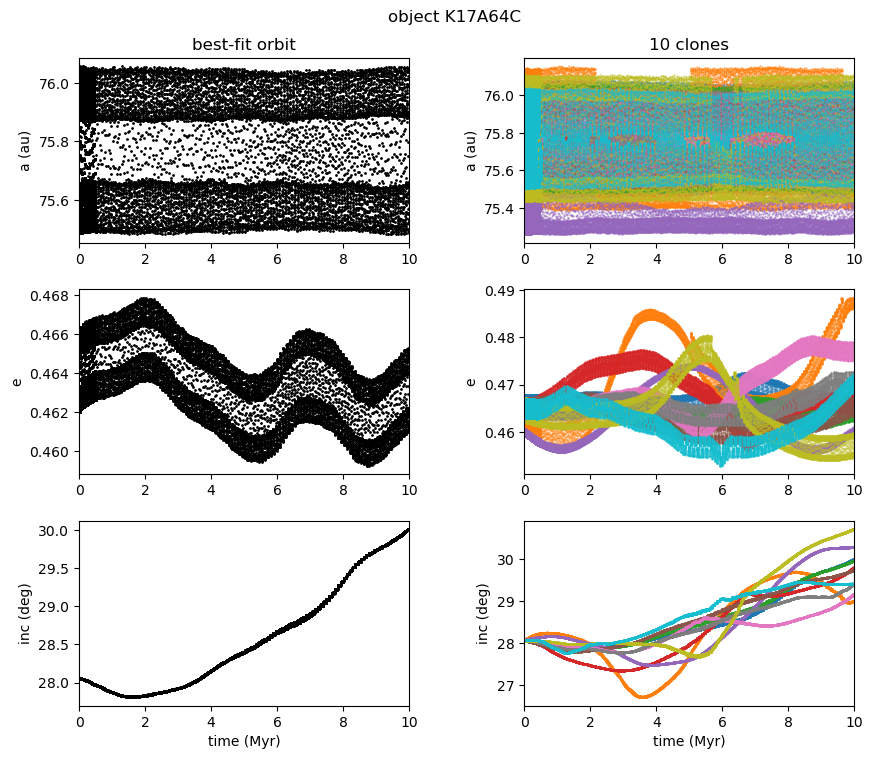

In [4]:
flag, aei_fig = sbd.plot_aei(des='K17A64C',datadir='outputs-from-example-notebooks')